# ISLP - Chapter 8 - Exercise 8
### Author: pzuehlke

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
import seaborn as sns

We begin by loading the dataset:

In [17]:
carseats = pd.read_csv("Carseats.csv")
carseats = carseats.dropna()
carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [18]:
n = carseats.shape[0]
p = carseats.shape[1] - 1
print(n, p)
carseats.info()

400 10
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


__8 (a):__ To fit a regression tree in item (b) using sklearn, we will need to
one-hot encode the `ShelveLoc` variable. Then we split the data into train and
test sets.

In [19]:
carseats = pd.get_dummies(carseats, drop_first=True)
carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes,US_Yes
0,9.50,138,73,11,276,120,42,17,False,False,True,True
1,11.22,111,48,16,260,83,65,10,True,False,True,True
2,10.06,113,35,10,269,80,59,12,False,True,True,True
3,7.40,117,100,4,466,97,55,14,False,True,True,True
4,4.15,141,64,3,340,128,38,13,False,False,True,False


In [20]:
X = carseats.drop(columns=["Sales"], axis=1)
y = carseats["Sales"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

__8 (b):__ For the single regression tree below we obtain a test MSE of $ 5.43 $. The most important features
in predicting sales seem to be: `Price`, a good `ShelveLoc`, `Age` and `CompPrice`.

In [21]:
reg_tree = DecisionTreeRegressor(random_state=0)
reg_tree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [22]:
y_pred = reg_tree.predict(X_test)
test_mse = mean_squared_error(y_test, y_pred)
print(f"Test MSE for the full tree: {test_mse:.4f}")
print(f"The tree's depth is {reg_tree.get_depth()}")

Test MSE for the full tree: 5.4279
The tree's depth is 14


In [23]:
feature_importances = pd.DataFrame({
    "Feature": X.columns,
    "Importance": reg_tree.feature_importances_
}).sort_values("Importance", ascending=False)

feature_importances

,Feature,Importance
4,Price,0.279673
7,ShelveLoc_Good,0.218034
5,Age,0.118255
0,CompPrice,0.110876
8,ShelveLoc_Medium,0.087200
2,Advertising,0.061020
3,Population,0.045051
1,Income,0.040933
6,Education,0.029877
10,US_Yes,0.006229


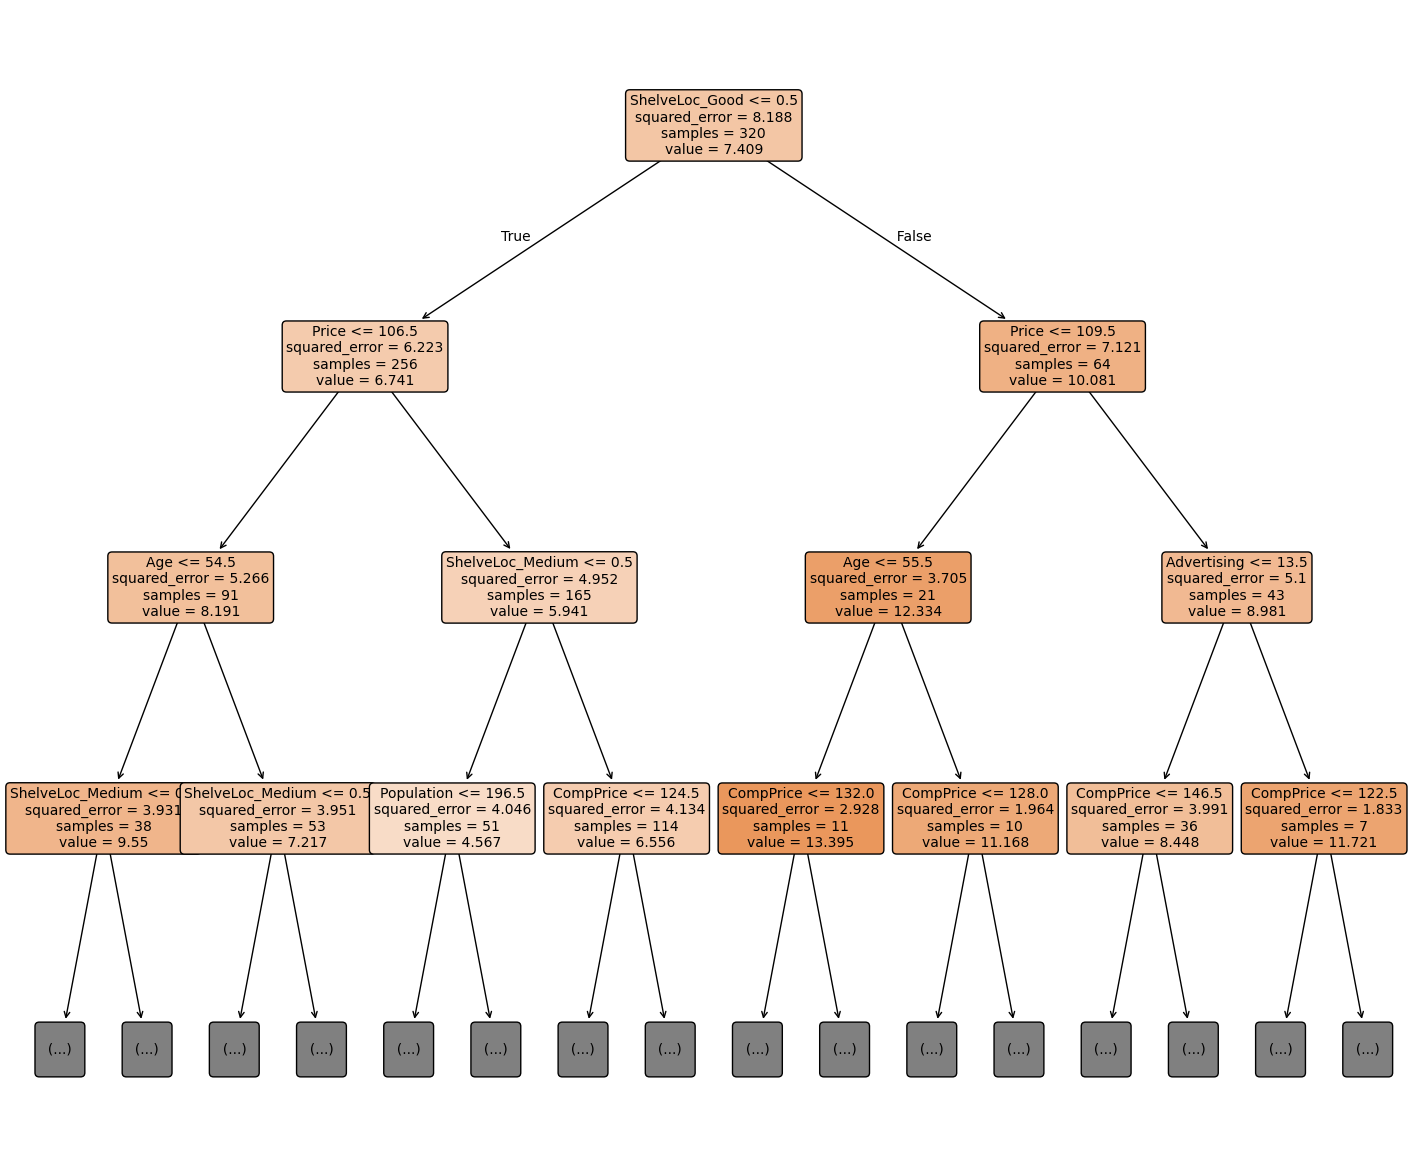

In [24]:
plt.figure(figsize=(18, 15))
plot_tree(reg_tree, max_depth=3, feature_names=X.columns, filled=True, rounded=True, fontsize=10)
plt.show()

__8 (c):__

In [25]:
unpruned_mse = test_mse
path = reg_tree.cost_complexity_pruning_path(X_train, y_train)

# Cross-validation to find optimal complexity:
param_grid = {"ccp_alpha": path.ccp_alphas}
grid_search = GridSearchCV(
    DecisionTreeRegressor(random_state=0),
    param_grid=param_grid,
    cv=5,
    scoring="neg_mean_squared_error"
)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'ccp_alpha': array([0.00000000e+00, 8.88178420e-17, 1.56250000e-07, 1.56250000e-07,
       1.56250000e-07, 1.56250000e-07, 1.56250000e-07, 1.56250000e-07,
       2.08333333e-07, 1.40625000e-06, 1.40625000e-06, 1.40625000e-06,
       1.40625000e-06, 1.40625000e-06, 2.50000000e-06, 2.50000000e-06,
       2.50000000e-0...
       7.04003384e-02, 7.63041038e-02, 8.11496299e-02, 9.27628907e-02,
       9.28200335e-02, 1.00129280e-01, 1.04223039e-01, 1.14031253e-01,
       1.15451446e-01, 1.22270189e-01, 1.42280557e-01, 1.49223343e-01,
       1.64246541e-01, 1.96233479e-01, 2.08429809e-01, 2.19330466e-01,
       3.76423622e-01, 4.35706050e-01, 4.95811947e-01, 9.27714395e-01,
       1.78523002e+00])},
             scoring='neg_mean_squared_error')

In [26]:
# Get best alpha and fit optimal tree:
best_alpha = grid_search.best_params_["ccp_alpha"]
optimal_tree = DecisionTreeRegressor(ccp_alpha=best_alpha, random_state=0)
optimal_tree.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=np.float64(0.037890053571429716),
                      random_state=0)

In [27]:
optimal_pred = optimal_tree.predict(X_test)
optimal_mse = mean_squared_error(y_test, optimal_pred)

print(f"Optimal MSE: {round(optimal_mse, 4)}")
print(f"Unpruned MSE: {round(unpruned_mse, 4)}")

Optimal MSE: 5.1943
Unpruned MSE: 5.4279


We conclude that cost-complexity pruning was able to slightly reduce the test
MSE from $ 5.43 $ to $ 5.19 $, an improvement of only $ 4.4 \% $.

__8 (d):__ Using bagging we are able to substantially reduce the test MSE from $ 5.43 $ to $ 2.28 $, a substantial relative improvement of $ 58 \% $.


In [28]:
bagging_model = RandomForestRegressor(n_estimators=100, bootstrap=True, random_state=0)
bagging_model.fit(X_train, y_train)
y_pred = bagging_model.predict(X_test)
bagging_test_mse = mean_squared_error(y_test, y_pred)
print(f"Test MSE for the bagging model: {bagging_test_mse:.4f}")

Test MSE for the bagging model: 2.2830


The $ 5 $ most important features are the same as for the original model (from item (b)):

In [29]:
feature_importances = pd.DataFrame({
    "Feature": X.columns,
    "Importance": bagging_model.feature_importances_
}).sort_values("Importance", ascending=False)
feature_importances

,Feature,Importance
4,Price,0.288119
7,ShelveLoc_Good,0.211884
5,Age,0.117257
0,CompPrice,0.108784
8,ShelveLoc_Medium,0.074928
2,Advertising,0.066360
1,Income,0.054122
3,Population,0.037110
6,Education,0.031585
10,US_Yes,0.006012


__8 (e):__ Let's first fit a random forest using the default values:

In [30]:
rf = RandomForestRegressor(random_state=0)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
rf_test_mse = mean_squared_error(y_test, y_pred)
print(f"Random forest test MSE: {rf_test_mse:.4f}")

Random forest test MSE: 2.2830


In [31]:
rf_test_mse_results = []
for m in range(1, p + 1):
    rf = RandomForestRegressor(max_features = m, n_estimators=100, random_state=0)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    rf_test_mse = mean_squared_error(y_test, y_pred)
    rf_test_mse_results.append(rf_test_mse)
    print(f"Test MSE with max_features = {m}: {rf_test_mse:.4f}")


Test MSE with max_features = 1: 3.4272
Test MSE with max_features = 2: 2.7469
Test MSE with max_features = 3: 2.3186
Test MSE with max_features = 4: 2.2118
Test MSE with max_features = 5: 2.0817
Test MSE with max_features = 6: 2.1818
Test MSE with max_features = 7: 2.1883
Test MSE with max_features = 8: 2.2067
Test MSE with max_features = 9: 2.2437
Test MSE with max_features = 10: 2.1209


We see that the best result is attained for $ m = 5 $ (which is approximately
equal to $ p / 2 $).  Let's reiterate its test MSE and determine which predictors
are most important for this model:

In [32]:
best_m = np.argmin(rf_test_mse_results) + 1
best_rf_model = RandomForestRegressor(max_features = best_m, n_estimators=100, random_state=0)
best_rf_model.fit(X_train, y_train)
feature_importances = pd.DataFrame({
    "Feature": X.columns,
    "Importance": best_rf_model.feature_importances_
}).sort_values("Importance", ascending=False)

print(f"Test MSE with max_features = {best_m}: {rf_test_mse_results[best_m - 1]:.4f}")
feature_importances

Test MSE with max_features = 5: 2.0817


,Feature,Importance
4,Price,0.268557
7,ShelveLoc_Good,0.184595
5,Age,0.117142
0,CompPrice,0.105933
2,Advertising,0.078607
1,Income,0.069435
8,ShelveLoc_Medium,0.060000
3,Population,0.053408
6,Education,0.041079
10,US_Yes,0.012291


The top $ 5 $ features are the same as before except for `Advertising`, which has displaced `SheleLoc_Medium` in the fifth position.
Finally, let's plot the test MSEs against $ m $:

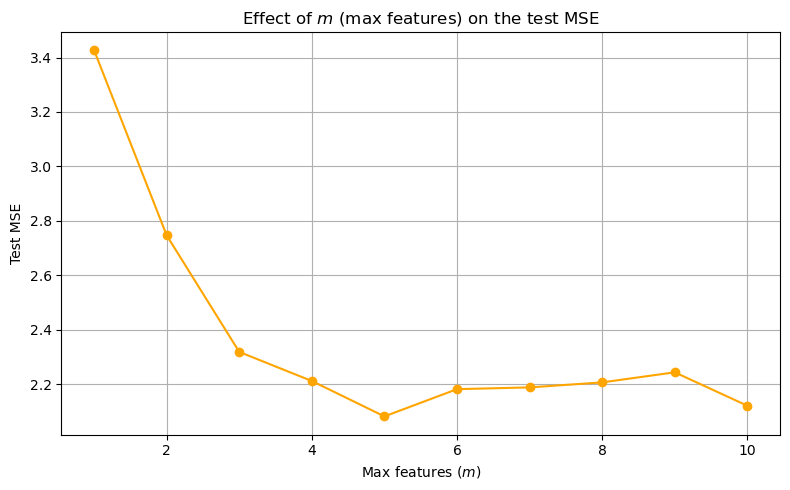

In [33]:
fig, ax = plt.subplots(figsize=(8, 5))
ms = np.arange(1, p + 1)
ax.plot(ms, rf_test_mse_results, marker='o', color="orange")
ax.set_xlabel('Max features ($ m $)')
ax.set_ylabel('Test MSE')
ax.set_title('Effect of $ m $ (max features) on the test MSE')
ax.grid(True)
plt.tight_layout()
plt.show()

__8 (f):__ For this item we use the `ISLP` library since currently there does
not seem to be any ready-made implementation of BART in the usual Python
libraries. 

In [34]:
from ISLP.bart import BART

We just follow the same pattern as in the lab (p. 362, bottom). However,
notice that some of the columns are categorical, one-hot encoded boolean
variables, and these don't work with BART (it tests the inputs using `isnan`,
which results in a `TypeError`). This can easily be fixed by converting
everything to `float`:

In [35]:
X_train_float = X_train.astype(float)
X_test_float = X_test.astype(float)

bart_seats = BART(random_state=0, burnin=5, ndraw=15)
bart_seats.fit(X_train_float, y_train)
y_pred = bart_seats.predict(X_test_float)
bart_test_mse = mean_squared_error(y_test, y_pred)
print(f"BART test MSE: {bart_test_mse:.4f}")

BART test MSE: 1.7746


Thus, BART yields the best model of all, using the test MSE as a metric.